Tüm metin temsili yöntemlerini kullanarak aşağıdaki dataframe i sayısal temsiller ile gösteriniz
BOW
TF-IDf
N-GRAM
Word Embeddings (Word2Vec)

Bu haftaki çalışmamda elimizdeki örnek dataframei sayısal temsiller ile göstereceğim

Yöntemler:
- BOW
- TF-IDf
- N-GRAM
- Word2Vec

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
!pip install gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

gerekli kütüphanelerin yüklenmesi yapıldıktan sonra veri setimizi tanımlayıp dataframe e çevirelim.

In [3]:
# Örnek veri
data = {
    "text": [
        "Manchester United won the match 2-1 after a thrilling game.",
        "The new smartphone model includes AI-based camera features.",
        "The president addressed the nation regarding the new policy.",
        "Regular exercise helps reduce the risk of heart diseases.",
        "The movie received positive reviews from critics and audiences.",
        "Serena Williams announced her retirement from tennis.",
        "Apple is planning to launch its VR headset next year.",
        "Government officials discussed the climate change agreement.",
        "A balanced diet and sleep are essential for good health.",
        "The upcoming film features several Oscar-winning actors.",
        "The team celebrated their championship victory with fans.",
        "Researchers developed a new algorithm for speech recognition.",
        "Parliament passed a new law to support small businesses.",
        "Doctors recommend regular check-ups for early diagnosis.",
        "The actor signed a contract for three upcoming movies."
    ],
    "label": [
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment",
        "Sports",
        "Technology",
        "Politics",
        "Health",
        "Entertainment"
    ]
}

# DataFrame oluştur
df = pd.DataFrame(data)
df

,text,label
0,Manchester United won the match 2-1 after a thrilling game.,Sports
1,The new smartphone model includes AI-based camera features.,Technology
2,The president addressed the nation regarding the new policy.,Politics
3,Regular exercise helps reduce the risk of heart diseases.,Health
4,The movie received positive reviews from critics and audiences.,Entertainment
5,Serena Williams announced her retirement from tennis.,Sports
6,Apple is planning to launch its VR headset next year.,Technology
7,Government officials discussed the climate change agreement.,Politics
8,A balanced diet and sleep are essential for good health.,Health
9,The upcoming film features several Oscar-winning actors.,Entertainment


In [4]:
df.shape


(15, 2)

In [5]:
df["label"].value_counts()

,count
label,
Sports,3
Technology,3
Politics,3
Health,3
Entertainment,3


# BOW (Bag of Words)

Kısaca açıklamak gerekirse bu yöntem bir metni kelimelerin yalnızca varlığına ve sıklığına göre temsil eder.

Yani sadece hangi kelime kaç kere geçmiş ona bakar. (frekans)


Şimdi metin ön işleme adımlarını tamamlayalım öncelikle tüm metni koca bir chunk halina getirelim vw bütün harfleri küçük harf yapalım.

Ardından rakamları stopwordsleri noktalama işretlerini temizleyelim

In [6]:
text = df["text"]
label = df["label"]

not_clean_text =  " ".join(text.astype(str))
not_clean_text

'Manchester United won the match 2-1 after a thrilling game. The new smartphone model includes AI-based camera features. The president addressed the nation regarding the new policy. Regular exercise helps reduce the risk of heart diseases. The movie received positive reviews from critics and audiences. Serena Williams announced her retirement from tennis. Apple is planning to launch its VR headset next year. Government officials discussed the climate change agreement. A balanced diet and sleep are essential for good health. The upcoming film features several Oscar-winning actors. The team celebrated their championship victory with fans. Researchers developed a new algorithm for speech recognition. Parliament passed a new law to support small businesses. Doctors recommend regular check-ups for early diagnosis. The actor signed a contract for three upcoming movies.'

label olmayan bütün kelimeleri içeren text variableımızı oluşturduk. Şimdi bunun üzerinde metin ön işleme adımlarını gerçekleştirebiliriz.

In [7]:
# metin ön işleme adımlarını gerçekleştirelim:

def metin_on_isleme(text):
  # büyük küçük harf
  text = text.lower()
  # rakamların temizlenmesi
  text = re.sub("[0-9]", "", text)
  # noktalama işaretlerinin (özel karakterlerin) temizlenmesi
  text = re.sub("[^\w\s]", "", text)
  # stop wordslerden temizlenmesi
  stop_words = set(stopwords.words('english'))
  kelimeler = text.split()
  kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
  kelimeler = " ".join(kelimeler)
  return kelimeler


cleaned_text = [metin_on_isleme(row) for row in text]
cleaned_text

['manchester united match thrilling game',
 'new smartphone model includes aibased camera features',
 'president addressed nation regarding new policy',
 'regular exercise helps reduce risk heart diseases',
 'movie received positive reviews critics audiences',
 'serena williams announced retirement tennis',
 'apple planning launch vr headset next year',
 'government officials discussed climate change agreement',
 'balanced diet sleep essential good health',
 'upcoming film features several oscarwinning actors',
 'team celebrated championship victory fans',
 'researchers developed new algorithm speech recognition',
 'parliament passed new law support small businesses',
 'doctors recommend regular checkups early diagnosis',
 'actor signed contract three upcoming movies']

Elde ettiğimiz text oldukça temiz görünüyor. Noktalama işaretlerinden büyük harflerden ve stopwordslerden arınmış ve üzerinde çalışmaya çok uygun bir halde.

Şimdi metnimizi vektörleştirme adımmına geçebiliriz.


In [8]:
# metin temsili için vectorizer tanımlayalım:
vectorizer = CountVectorizer()

# metni sayısal temsillere çevirelim:
X = vectorizer.fit_transform(cleaned_text)
X

<15x85 sparse matrix of type '<class 'numpy.int64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [9]:
words = vectorizer.get_feature_names_out()
words

array(['actor', 'actors', 'addressed', 'agreement', 'aibased',
       'algorithm', 'announced', 'apple', 'audiences', 'balanced',
       'businesses', 'camera', 'celebrated', 'championship', 'change',
       'checkups', 'climate', 'contract', 'critics', 'developed',
       'diagnosis', 'diet', 'discussed', 'diseases', 'doctors', 'early',
       'essential', 'exercise', 'fans', 'features', 'film', 'game',
       'good', 'government', 'headset', 'health', 'heart', 'helps',
       'includes', 'launch', 'law', 'manchester', 'match', 'model',
       'movie', 'movies', 'nation', 'new', 'next', 'officials',
       'oscarwinning', 'parliament', 'passed', 'planning', 'policy',
       'positive', 'president', 'received', 'recognition', 'recommend',
       'reduce', 'regarding', 'regular', 'researchers', 'retirement',
       'reviews', 'risk', 'serena', 'several', 'signed', 'sleep', 'small',
       'smartphone', 'speech', 'support', 'team', 'tennis', 'three',
       'thrilling', 'united', 'upcomi

In [10]:
# vektör temsili:
text_bow = pd.DataFrame(X.toarray(), columns=words)
text_bow

,actor,actors,addressed,agreement,aibased,algorithm,announced,apple,audiences,balanced,businesses,camera,celebrated,championship,change,checkups,climate,contract,critics,developed,diagnosis,diet,discussed,diseases,doctors,early,essential,exercise,fans,features,film,game,good,government,headset,health,heart,helps,includes,launch,law,manchester,match,model,movie,movies,nation,new,next,officials,oscarwinning,parliament,passed,planning,policy,positive,president,received,recognition,recommend,reduce,regarding,regular,researchers,retirement,reviews,risk,serena,several,signed,sleep,small,smartphone,speech,support,team,tennis,three,thrilling,united,upcoming,victory,vr,williams,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
kelime_frekanslari = text_bow.sum(axis=0).sort_values(ascending=False)
kelime_frekanslari

,0
new,4
regular,2
upcoming,2
features,2
policy,1
...,...
essential,1
early,1
doctors,1
diseases,1


In [13]:
# ilk 10 kelimeye bakalım:
most_common = kelime_frekanslari.head(10)
most_common

,0
new,4
regular,2
upcoming,2
features,2
policy,1
regarding,1
reduce,1
recommend,1
recognition,1
received,1


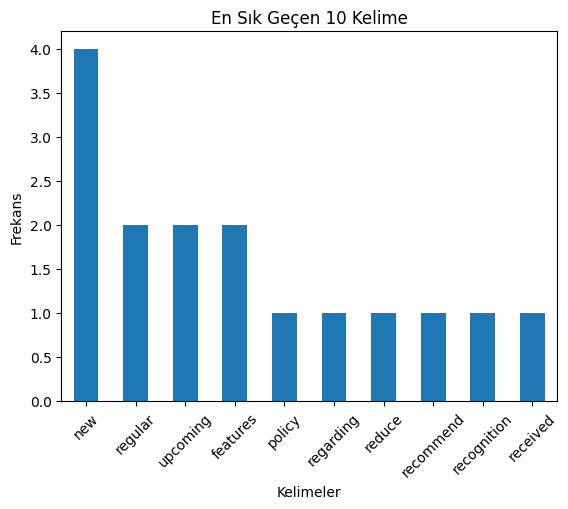

In [14]:
# görselleştirelim:

import matplotlib.pyplot as plt

kelime_frekanslari.head(10).plot(kind="bar")
plt.title("En Sık Geçen 10 Kelime")
plt.xlabel("Kelimeler")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()

Bag of Words yöntemini uyguladıktan sonra elde ettiğimiz sonuca göre en sık geçen kelime "new" iken onu "regular" takip ediyor.

Bu yöntemde sadece kelimelerin frekanslarını gözlemleyebilmekteyiz aslında.

Yani birbirleriyle olan ilişkileri kelimelerin sırası grameri ve anlamını tamamen göz ardı ediyoruz.

# TF-IDF

Bu yöntem yine kelimelerin frekansını da ölçer fakat bow a göre daha akıllı ilerler diyebiliriz.

Mesela:

Bag of Words, "elma" 10 kere geçti diye onun önemli olduğunu sanabilir. Ama "elma" her belgede varsa, TF-IDF bunu fark eder ve puanını düşürür.

Daha anlamlı ve ayırt edici kelimelere yüksek puan verir.

Yani TF-IDF yöntemi hangi kelimenin önemli/ayırt edici olduğunu sayılarla ifade eder.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici nesnesi oluşturalım
vectorizer = TfidfVectorizer()

# Metinleri vektörleştirelim
X = vectorizer.fit_transform(cleaned_text)
X

# Sonuçları DataFrame olarak gösterelim
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.round(4))

    actor  actors  addressed  agreement  aibased  algorithm  announced  apple  audiences  balanced  businesses  camera  celebrated  championship  change  checkups  climate  contract  critics  \
0    0.00    0.00       0.00       0.00     0.00       0.00       0.00   0.00       0.00      0.00        0.00    0.00        0.00          0.00    0.00      0.00     0.00      0.00     0.00   
1    0.00    0.00       0.00       0.00     0.40       0.00       0.00   0.00       0.00      0.00        0.00    0.40        0.00          0.00    0.00      0.00     0.00      0.00     0.00   
2    0.00    0.00       0.43       0.00     0.00       0.00       0.00   0.00       0.00      0.00        0.00    0.00        0.00          0.00    0.00      0.00     0.00      0.00     0.00   
3    0.00    0.00       0.00       0.00     0.00       0.00       0.00   0.00       0.00      0.00        0.00    0.00        0.00          0.00    0.00      0.00     0.00      0.00     0.00   
4    0.00    0.00       0.00  

Şimdi de her kelimenin toplam tf-idf skorunu hesaplayıp en yüksek 10 unu tablo halinde gösterelim

In [16]:
# Her kelimenin toplam TF-IDF skorunu hesaplayalım
total_scores = tfidf_df.sum().sort_values(ascending=False)

# En yüksek 10 kelimeyi gösterelim
top10 = total_scores.head(10)

print("En yüksek 10 TF-IDF skoru:")
print(top10)

En yüksek 10 TF-IDF skoru:
new          1.16
upcoming     0.73
features     0.72
regular      0.70
match        0.45
celebrated   0.45
game         0.45
fans         0.45
retirement   0.45
manchester   0.45
dtype: float64


TF-IDF değeri yüksek olan bir kelime, o belge için ayırt edici ve önemli bir kelimedir çünkü belgede sık geçerken diğer belgelerde nadiren görülür.

"new" kelimesi bu metin için ayırt edici bir kelimeymiş diyebiliriz.

# N-GRAM


n-gram metin temsili, bir metni art arda gelen n kelimelik gruplara bölerek temsil etme yöntemidir.

Tek kelime değil, kelimelerin birlikte nasıl kullanıldığını anlamamıza yardımcı olur.

In [18]:
# Listeyi pandas Series'e çevir
uni_df = pd.Series(cleaned_text)

In [19]:
# unigram, bigram, trigram modelleri:
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))


In [20]:
# unigram:
X_unigram = vectorizer_unigram.fit_transform(uni_df)
unigram_features = vectorizer_unigram.get_feature_names_out()
unigram_features

array(['actor', 'actors', 'addressed', 'agreement', 'aibased',
       'algorithm', 'announced', 'apple', 'audiences', 'balanced',
       'businesses', 'camera', 'celebrated', 'championship', 'change',
       'checkups', 'climate', 'contract', 'critics', 'developed',
       'diagnosis', 'diet', 'discussed', 'diseases', 'doctors', 'early',
       'essential', 'exercise', 'fans', 'features', 'film', 'game',
       'good', 'government', 'headset', 'health', 'heart', 'helps',
       'includes', 'launch', 'law', 'manchester', 'match', 'model',
       'movie', 'movies', 'nation', 'new', 'next', 'officials',
       'oscarwinning', 'parliament', 'passed', 'planning', 'policy',
       'positive', 'president', 'received', 'recognition', 'recommend',
       'reduce', 'regarding', 'regular', 'researchers', 'retirement',
       'reviews', 'risk', 'serena', 'several', 'signed', 'sleep', 'small',
       'smartphone', 'speech', 'support', 'team', 'tennis', 'three',
       'thrilling', 'united', 'upcomi

In [21]:
# DataFrame’e aktar
df = pd.DataFrame(X_unigram.toarray(), columns=unigram_features)
print(df)

    actor  actors  addressed  agreement  aibased  algorithm  announced  apple  audiences  balanced  businesses  camera  celebrated  championship  change  checkups  climate  contract  critics  \
0       0       0          0          0        0          0          0      0          0         0           0       0           0             0       0         0        0         0        0   
1       0       0          0          0        1          0          0      0          0         0           0       1           0             0       0         0        0         0        0   
2       0       0          1          0        0          0          0      0          0         0           0       0           0             0       0         0        0         0        0   
3       0       0          0          0        0          0          0      0          0         0           0       0           0             0       0         0        0         0        0   
4       0       0          0  

unşgram olarak ayırdığımız metinleri gözlemleyebiliyoruz yani tek kelimelik parçalar

bigramda ise metinleri ikili olarak ayıracağız.

In [22]:
# bigram:
X_bigram = vectorizer_bigram.fit_transform(uni_df)
bigram_features = vectorizer_bigram.get_feature_names_out()
bigram_features

array(['actor signed', 'addressed nation', 'aibased camera',
       'algorithm speech', 'announced retirement', 'apple planning',
       'balanced diet', 'camera features', 'celebrated championship',
       'championship victory', 'change agreement', 'checkups early',
       'climate change', 'contract three', 'critics audiences',
       'developed new', 'diet sleep', 'discussed climate',
       'doctors recommend', 'early diagnosis', 'essential good',
       'exercise helps', 'features several', 'film features',
       'good health', 'government officials', 'headset next',
       'heart diseases', 'helps reduce', 'includes aibased', 'launch vr',
       'law support', 'manchester united', 'match thrilling',
       'model includes', 'movie received', 'nation regarding',
       'new algorithm', 'new law', 'new policy', 'new smartphone',
       'next year', 'officials discussed', 'oscarwinning actors',
       'parliament passed', 'passed new', 'planning launch',
       'positive reviews',

In [23]:
# DataFrame’e aktar
df = pd.DataFrame(X_bigram.toarray(), columns=bigram_features)
print(df)

    actor signed  addressed nation  aibased camera  algorithm speech  announced retirement  apple planning  balanced diet  camera features  celebrated championship  championship victory  \
0              0                 0               0                 0                     0               0              0                0                        0                     0   
1              0                 0               1                 0                     0               0              0                1                        0                     0   
2              0                 1               0                 0                     0               0              0                0                        0                     0   
3              0                 0               0                 0                     0               0              0                0                        0                     0   
4              0                 0               0     

ikili olarak ayırdığımız metinleri de gözlemlemekteyiz


Son olarak 3 lü pairler halinde böleceğiz metinleri


In [24]:
# trigram:
X_trigram = vectorizer_trigram.fit_transform(uni_df)
trigram_features = vectorizer_trigram.get_feature_names_out()
trigram_features

array(['actor signed contract', 'addressed nation regarding',
       'aibased camera features', 'algorithm speech recognition',
       'announced retirement tennis', 'apple planning launch',
       'balanced diet sleep', 'celebrated championship victory',
       'championship victory fans', 'checkups early diagnosis',
       'climate change agreement', 'contract three upcoming',
       'developed new algorithm', 'diet sleep essential',
       'discussed climate change', 'doctors recommend regular',
       'essential good health', 'exercise helps reduce',
       'features several oscarwinning', 'film features several',
       'government officials discussed', 'headset next year',
       'helps reduce risk', 'includes aibased camera',
       'launch vr headset', 'law support small',
       'manchester united match', 'match thrilling game',
       'model includes aibased', 'movie received positive',
       'nation regarding new', 'new algorithm speech', 'new law support',
       'new smar

In [25]:
# DataFrame’e aktar
df = pd.DataFrame(X_trigram.toarray(), columns=trigram_features)
print(df)

    actor signed contract  addressed nation regarding  aibased camera features  algorithm speech recognition  announced retirement tennis  apple planning launch  balanced diet sleep  \
0                       0                           0                        0                             0                            0                      0                    0   
1                       0                           0                        1                             0                            0                      0                    0   
2                       0                           1                        0                             0                            0                      0                    0   
3                       0                           0                        0                             0                            0                      0                    0   
4                       0                           0                      

# Word2Vec

Kelimeleri vektörlerle temsil etmek için Word2Vec yönetimi kullanacağız.

Word2Vec nedir ve ne işe yarar:

Word2Vec, kelimeleri sayılardan oluşan vektörler ile temsil eden bir yöntemdir. Amacı, kelimeler arasındaki anlam ilişkilerini bu vektörler üzerinden yansıtmaktır.


Word2Vec = Kelimeleri anlamına göre sayılara çeviren bir yöntem.
Bu sayede bilgisayarlar kelimelerin benzerliklerini anlayabilir ve karşılaştırabilir.

In [26]:
cleaned_text

['manchester united match thrilling game',
 'new smartphone model includes aibased camera features',
 'president addressed nation regarding new policy',
 'regular exercise helps reduce risk heart diseases',
 'movie received positive reviews critics audiences',
 'serena williams announced retirement tennis',
 'apple planning launch vr headset next year',
 'government officials discussed climate change agreement',
 'balanced diet sleep essential good health',
 'upcoming film features several oscarwinning actors',
 'team celebrated championship victory fans',
 'researchers developed new algorithm speech recognition',
 'parliament passed new law support small businesses',
 'doctors recommend regular checkups early diagnosis',
 'actor signed contract three upcoming movies']

Daha önceden temizlediğimiz cleaned texti kullanacağım.

Bunu öncelikle tokenlara ayr-ırmalı sonra da her kelimeyi vektörleştirmeliyiz.



In [27]:
tokenized_data = [sentence.split() for sentence in cleaned_text]

In [29]:
model = Word2Vec(
    sentences=tokenized_data,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1  # Skip-gram
)


Kelimelerimizi vektörleştirdik. Şimdi örneğim "game" kelimesine benzer kelimeler neymiş ona bakalım .

In [30]:
print(model.wv.most_similar("game", topn=5))

[('manchester', 0.2513545751571655), ('change', 0.17471471428871155), ('regular', 0.17136695981025696), ('diet', 0.1527937799692154), ('team', 0.14801673591136932)]


In [31]:
print(model.wv.most_similar("new", topn=5))

[('diet', 0.2902573347091675), ('tennis', 0.22082151472568512), ('critics', 0.21608364582061768), ('officials', 0.20589935779571533), ('thrilling', 0.19555021822452545)]


In [32]:
print(model.wv.most_similar("manchester", topn=5))

[('movies', 0.2702358365058899), ('game', 0.2513545751571655), ('diseases', 0.2092372328042984), ('regular', 0.1893770396709442), ('positive', 0.16053159534931183)]


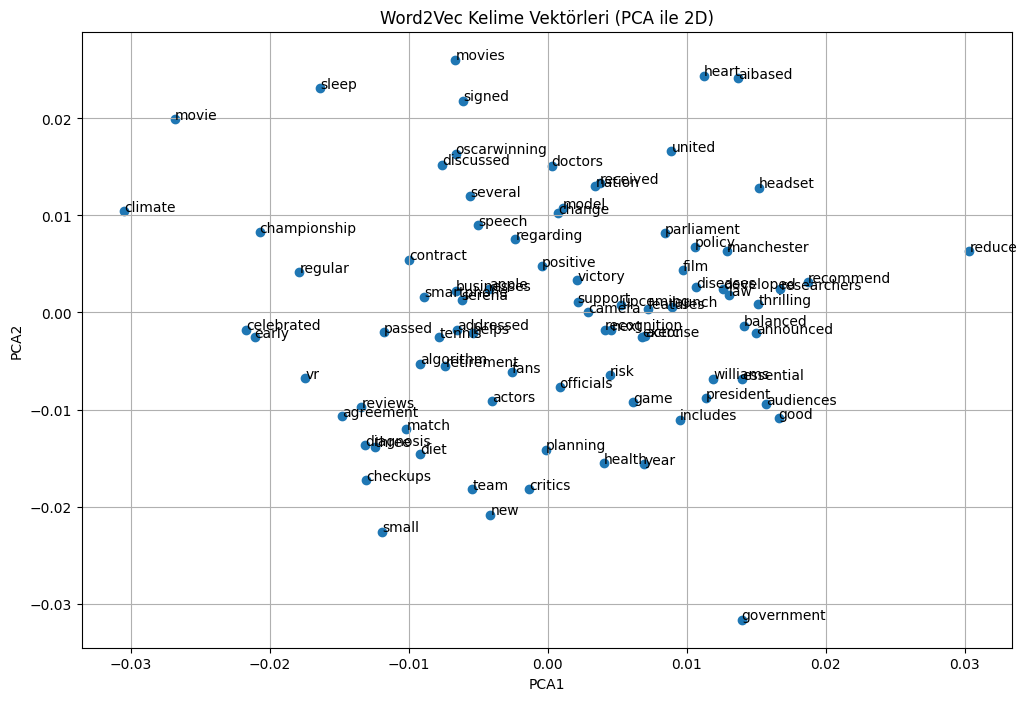

In [34]:
from sklearn.decomposition import PCA
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Görselleştir
plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])

# Her kelimeyi nokta üstüne yaz
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec Kelime Vektörleri (PCA ile 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

Bu görselleştirme ile de hangi kelimeler birbirine daha yakın, aralarındaki mesafe ne kadar gibi soruları gözlemleyebiliyoruz.

Bu çalışmayla birlikte metin verilerini farklı yöntemlerle sayısal olarak temsil etmeyi uygulamalı şekilde öğrenmiş oldum. BOW ve TF-IDF gibi temel yöntemlerle kelime sıklığına dayalı temsiller oluştururken, n-gram sayesinde kelimeler arası bağlamı daha iyi yakalayabildim. Word2Vec ise kelimeler arasındaki anlam ilişkilerini vektörlerle ifade etmemi sağladı ve bu yönüyle diğer yöntemlere göre daha derin bir temsil sundu. Her yöntemin güçlü ve sınırlı yönlerini gözlemlemek, ileride hangi problemler için hangi yaklaşımı tercih edebileceğim konusunda bana iyi bir farkındalık kazandırdı.

Ayşe Nur Özer